<a href="https://colab.research.google.com/github/LeeDongGeon1996/TensorFlow-study-note/blob/master/Lab_09_1_neural_nets_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab_09_1 neural nets XOR
 * implement XOR using multi-layer network.
 
  


#### This code is what I implemented.

In [89]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import time

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.1.0


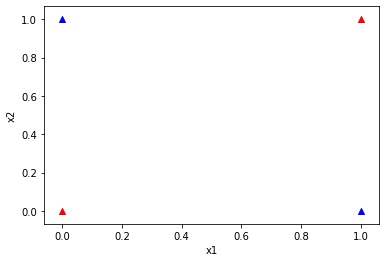

In [90]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

# My implementation.

In [91]:


def hypothesis(features):

  input_layer_logit = tf.matmul(features, W_input) + b_input
  input_layer = tf.sigmoid(input_layer_logit)
  output_layer_logit = tf.matmul(input_layer, W_output) + b_output
  output_layer = tf.sigmoid(output_layer_logit)

  return output_layer

def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def get_cost(features, labels):
  output = hypothesis(features)
  cost = labels * tf.math.log(output) + (1-labels) * tf.math.log(1-output)
  mean_cost = -tf.reduce_mean(cost)

  return mean_cost

def get_accuracy(features, labels):
  output = hypothesis(features)
  output = tf.cast(output > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(output,labels), dtype=tf.float32))
  
  return accuracy

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def fit(dataset, epoch=50000, verbose=5000):
  for i in range(epoch):
    for features, labels in dataset:    
      with tf.GradientTape() as g:
        cost = get_cost(features, labels)
        grads = g.gradient(cost, [W_input, W_output, b_input, b_output])
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W_input, W_output, b_input, b_output]))

      if((i % verbose) == 0):
        print("Epoch : {}, Loss : {:.4f}".format(i, cost))


start = time.time()  # 시작 시간 저장
for k in range(1):
  W_input = tf.Variable(tf.random.normal([2,2]), dtype = tf.float32)
  b_input = tf.Variable(tf.random.normal([1,2]), dtype=tf.float32)
  W_output = tf.Variable(tf.random.normal([2,1]), dtype = tf.float32)
  b_output = tf.Variable(tf.random.normal([1,]), dtype=tf.float32)

  x_data = [[0, 0],
            [0, 1],
            [1, 0],
            [1, 1]]
  y_data = [[0],
            [1],
            [1],
            [0]]
  x_data, y_data = preprocess_data(x_data, y_data)
  dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
  fit(dataset)

  test_acc = get_accuracy(x_data, y_data)
  print('test accr : {}'.format(test_acc))

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간


Epoch : 0, Loss : 1.0163
Epoch : 5000, Loss : 0.6933
Epoch : 10000, Loss : 0.6930
Epoch : 15000, Loss : 0.6925
Epoch : 20000, Loss : 0.6914
Epoch : 25000, Loss : 0.6879
Epoch : 30000, Loss : 0.6748
Epoch : 35000, Loss : 0.6232
Epoch : 40000, Loss : 0.4802
Epoch : 45000, Loss : 0.2679
test accr : 1.0
time : 264.1743702888489
